# Project Description

Megaline is a mobile operator. Clients are offered two tariff plans: "Smart" and "Ultra". To adjust the advertising budget, the commercial department wants to understand which tariff brings in more money.
It is necessary to make a preliminary analysis of tariffs on a small sample of customers. The data of 500 Megaline users is available: who they are, where they are from, what tariff they use, how many calls and messages each sent in 2018. It is necessary to analyze the behavior of customers and draw a conclusion - which tariff is better.

# Plans Description

## "Smart" plan
- Monthly fee: 550 rubles
- Included 500 minutes of calls, 50 messages and 15 GB of internet traffic
- The cost of services above the tariff package:
- minute of conversation: 3 rubles
- message: 3 rubles
- 1 GB of Internet traffic: 200 rubles

## "Ultra" plan
- Monthly fee: 1950 rubles
- Included 3000 minutes of calls, 1000 messages and 30 GB of internet traffic
- The cost of services above the tariff package:
- minute of conversation: 1 ruble
- message: 1 ruble
- 1 GB of Internet traffic: 150 rubles

# Data Description

## Users table (user information):
- user_id - unique user ID
- first_name - username
- last_name - last name of the user
- age — user's age (years)
- reg_date — tariff connection date (day, month, year)
- churn_date — date when the tariff was discontinued (if the value is omitted, then the tariff was still valid at the time of data upload)
- city — user's city of residence
- tariff — tariff plan name

## Table calls (information about calls):
- id — unique call number
- call_date — call date
- duration — call duration in minutes
- user_id — identifier of the user who made the call

## Messages table (message information):
- id — unique message number
- message_date — message date
- user_id — identifier of the user who sent the message

## internet table (information about internet sessions):

- id — unique session number
- mb_used - the amount of Internet traffic spent per session (in megabytes)
- session_date — internet session date
- user_id - user ID

## Tariffs table (tariff information):
- tariff_name — tariff name
- rub_monthly_fee — monthly subscription fee in rubles
- minutes_included - the number of minutes of conversation per month included in the subscription fee
- messages_included - number of messages per month included in the subscription fee
- mb_per_month_included - the amount of Internet traffic included in the subscription fee (in megabytes)
- rub_per_minute - the cost of a minute of conversation in excess of the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
- rub_per_message - the cost of sending a message in excess of the tariff package
- rub_per_gb - the cost of an additional gigabyte of Internet traffic in excess of the tariff package (1 gigabyte = 1024 megabytes)

# Part 1. Import data files, study general information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
# Let's define a function for printing a dataset and information about it

def print_df(table):
    
    display(table)
    print()
    table.info()

### Users

In [3]:
#df_users = pd.read_csv('C:/Users/KDG/Google Drive/data science/4 Статистический анализ данных/project/users.csv', sep=',')
df_users = pd.read_csv('/datasets/users.csv', sep=',')
print_df(df_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Calls

In [4]:
df_calls = pd.read_csv('/datasets/calls.csv', sep=',')
print_df(df_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


### Messages

In [5]:
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')
print_df(df_messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Internet

In [6]:
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
print_df(df_internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Тарифы

In [7]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
print_df(df_tariffs)   

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


# Part 2. Data preparation

## Change the data types of the columns to more appropriate ones and fill in the gaps where needed

### Users

In [8]:
# Let's define a function to print the unique values of each column. This is necessary in order to view the data "with the eyes"
def print_df_c(table):
    
    for name_col in table.columns:
        print(name_col)
        print()
        print(table[name_col].value_counts().sort_values(ascending=False).head(1000))
        print()
        print('---------------------------------------------------------------------------------------------------------------')
        print()

In [9]:
print_df_c(df_users)

user_id

1024    1
1035    1
1054    1
1053    1
1052    1
1025    1
1026    1
1027    1
1028    1
1029    1
1030    1
1031    1
1032    1
1033    1
1034    1
1036    1
1051    1
1037    1
1038    1
1039    1
1040    1
1041    1
1042    1
1043    1
1044    1
1045    1
1046    1
1047    1
1048    1
1049    1
1055    1
1083    1
1082    1
1081    1
1147    1
1069    1
1056    1
1057    1
1058    1
1059    1
1060    1
1061    1
1062    1
1063    1
1064    1
1065    1
1066    1
1067    1
1068    1
1070    1
1146    1
1071    1
1072    1
1073    1
1074    1
1075    1
1076    1
1077    1
1078    1
1079    1
1080    1
1050    1
1084    1
1365    1
1099    1
1087    1
1115    1
1088    1
1089    1
1090    1
1091    1
1092    1
1093    1
1094    1
1095    1
1096    1
1097    1
1098    1
1100    1
1085    1
1101    1
1102    1
1103    1
1104    1
1105    1
1106    1
1107    1
1108    1
1109    1
1110    1
1111    1
1112    1
1113    1
1116    1
1118    1
1145    1
1144    1
1086    1
1117    1
1

In [10]:
df_users['churn_date'].fillna(0)
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [11]:
# Check for duplicates
df_users.duplicated().sum()

0

### Calls

In [12]:
print_df_c(df_calls)

id

1023_105     1
1210_262     1
1005_846     1
1290_443     1
1125_67      1
1354_59      1
1250_139     1
1352_685     1
1248_157     1
1111_125     1
1051_235     1
1412_590     1
1114_135     1
1027_172     1
1412_596     1
1029_343     1
1025_244     1
1049_621     1
1352_873     1
1476_459     1
1395_199     1
1201_283     1
1004_31      1
1446_68      1
1363_907     1
1176_459     1
1083_354     1
1173_211     1
1457_462     1
1050_66      1
1203_37      1
1186_237     1
1451_217     1
1165_83      1
1025_189     1
1174_245     1
1395_281     1
1305_7       1
1085_8       1
1443_256     1
1006_503     1
1329_74      1
1247_42      1
1298_206     1
1179_563     1
1254_295     1
1346_36      1
1415_179     1
1468_324     1
1102_448     1
1015_371     1
1433_260     1
1409_199     1
1224_566     1
1246_15      1
1475_149     1
1196_455     1
1015_141     1
1471_35      1
1344_432     1
1289_555     1
1294_159     1
1302_3       1
1011_329     1
1138_190     1
1142_279     1
1274_4

In [13]:
# Lots of calls with zero duration. This indicates that the call was missed. It makes sense to remove these values,
# as further you will find the number of calls and the number of spent minutes by month

index = df_calls[df_calls['duration'] == 0].index
df_calls = df_calls.drop(index).reset_index(drop=True)


df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int64')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162994 entries, 0 to 162993
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


In [14]:
# Check for duplicates
df_calls.duplicated().sum()

0

### Messages

In [15]:
print_df_c(df_messages)

id

1023_105     1
1356_27      1
1346_36      1
1058_39      1
1045_619     1
1244_502     1
1043_36      1
1341_88      1
1039_692     1
1354_59      1
1250_139     1
1099_343     1
1454_181     1
1460_293     1
1450_33      1
1414_240     1
1372_284     1
1261_16      1
1196_872     1
1417_239     1
1431_205     1
1025_244     1
1082_35      1
1167_527     1
1083_354     1
1234_57      1
1415_179     1
1445_26      1
1288_158     1
1227_194     1
1431_149     1
1365_41      1
1050_66      1
1346_80      1
1453_112     1
1186_237     1
1025_189     1
1176_459     1
1353_360     1
1257_587     1
1257_284     1
1393_80      1
1032_234     1
1039_232     1
1052_377     1
1212_84      1
1265_180     1
1203_37      1
1165_83      1
1064_288     1
1174_245     1
1395_281     1
1324_569     1
1423_6       1
1421_401     1
1226_628     1
1002_49      1
1395_199     1
1004_31      1
1004_1000    1
1044_26      1
1369_390     1
1302_3       1
1080_66      1
1440_298     1
1409_199     1
1174_1

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [17]:
# Check for duplicates
df_messages.duplicated().sum()

0

### Интернет

In [18]:
print_df_c(df_internet)

Unnamed: 0

0         1
43029     1
10245     1
12294     1
32784     1
14343     1
18441     1
20490     1
22539     1
24588     1
26637     1
28686     1
16392     1
69666     1
71715     1
73764     1
114744    1
8196      1
6147      1
4098      1
59421     1
47127     1
49176     1
36882     1
51225     1
55323     1
57372     1
61470     1
2049      1
63519     1
65568     1
53274     1
67617     1
34833     1
30735     1
116793    1
118842    1
120891    1
98352     1
86058     1
88107     1
90156     1
92205     1
94254     1
96303     1
100401    1
81960     1
102450    1
104499    1
145479    1
142277    1
145607    1
256       1
84009     1
79911     1
122940    1
137283    1
124989    1
112695    1
127038    1
131136    1
133185    1
135234    1
139332    1
77862     1
141381    1
129087    1
110646    1
108597    1
106548    1
75813     1
45078     1
40980     1
41364     1
38931     1
10373     1
12422     1
32912     1
14471     1
18569     1
20618     1
22667     1
2471

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).astype('int64')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [20]:
# Check for duplicates
df_internet.duplicated().sum()

0

### Tariffs

In [21]:
print_df_c(df_tariffs)
df_tariffs.info()

messages_included

1000    1
50      1
Name: messages_included, dtype: int64

---------------------------------------------------------------------------------------------------------------

mb_per_month_included

15360    1
30720    1
Name: mb_per_month_included, dtype: int64

---------------------------------------------------------------------------------------------------------------

minutes_included

500     1
3000    1
Name: minutes_included, dtype: int64

---------------------------------------------------------------------------------------------------------------

rub_monthly_fee

1950    1
550     1
Name: rub_monthly_fee, dtype: int64

---------------------------------------------------------------------------------------------------------------

rub_per_gb

200    1
150    1
Name: rub_per_gb, dtype: int64

---------------------------------------------------------------------------------------------------------------

rub_per_message

1    1
3    1
Name: rub_per_message, dty

## Count data for each user

### Let's create a dataframe with all the statistics. Add the following monthly data to it:
- calls made
- spent minutes of conversation
- the number of messages sent
- the amount of Internet traffic used
- monthly revenue from each user

In [22]:
# Let's add a column with operation months to each type of service
df_calls['month'] = df_calls['call_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month

# Create dataframes with service costs for each type
count_calls = df_calls.groupby(['user_id', 'month']).agg({'user_id': 'count', 'duration': 'sum'}).rename(columns={'user_id':'count_calls'}).reset_index()
count_messages = df_messages.groupby(['user_id', 'month']).agg({'user_id': 'count'}).rename(columns={'user_id':'count_messages'}).reset_index()
count_internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

print_df(count_calls)
print_df(count_messages)
print_df(count_internet)

,user_id,month,count_calls,duration
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466
...,...,...,...,...
3163,1498,10,30,247
3164,1499,9,8,70
3165,1499,10,44,449
3166,1499,11,62,612



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 4 columns):
user_id        3168 non-null int64
month          3168 non-null int64
count_calls    3168 non-null int64
duration       3168 non-null int64
dtypes: int64(4)
memory usage: 99.1 KB


,user_id,month,count_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id           2717 non-null int64
month             2717 non-null int64
count_messages    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3198,1498,10,20604
3199,1499,9,1848
3200,1499,10,17809
3201,1499,11,17984



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
mb_used    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


In [23]:
# Let's create a common dataframe with costs for each type of service

df_general = pd.merge(count_calls, count_messages, on=['user_id', 'month'], how='outer')
df_general = pd.merge(df_general, count_internet, on=['user_id', 'month'], how='outer')
df_general = pd.merge(df_general, df_users[['user_id', 'city', 'tariff']], on='user_id', how='outer')
df_tariffs = df_tariffs.rename(columns={'tariff_name':'tariff'})
df_general = pd.merge(df_general, df_tariffs, on='tariff', how='outer')


print_df(df_general)

,user_id,month,count_calls,duration,count_messages,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,17.0,159.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,28.0,172.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,41.0,340.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,42.0,408.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,46.0,466.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,9.0,NaN,NaN,32.0,17232.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,10.0,NaN,NaN,21.0,19588.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3213,1489,11.0,NaN,NaN,20.0,17516.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3214,1489,12.0,NaN,NaN,35.0,17341.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
count_calls              3168 non-null float64
duration                 3168 non-null float64
count_messages           2717 non-null float64
mb_used                  3203 non-null float64
city                     3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 402.0+ KB


In [24]:
# There are two `users_id` with no indication of using the number. Let's see in more detail
print_df(df_users.query('user_id == "1128"'))
print_df(df_users.query('user_id == "1371"'))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 128 to 128
Data columns (total 8 columns):
user_id       1 non-null int64
age           1 non-null int64
churn_date    1 non-null datetime64[ns]
city          1 non-null object
first_name    1 non-null object
last_name     1 non-null object
reg_date      1 non-null datetime64[ns]
tariff        1 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 72.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 371 to 371
Data columns (total 8 columns):
user_id       1 non-null int64
age           1 non-null int64
churn_date    1 non-null datetime64[ns]
city          1 non-null object
first_name    1 non-null object
last_name     1 non-null object
reg_date      1 non-null datetime64[ns]
tariff        1 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 72.0+ bytes


In [25]:
# They can be removed from the selection. They canceled the contract for communication a few days after the connection.
# They did not perform any actions, they can be removed from the selection
df_general = df_general.dropna(subset=['month']).reset_index(drop=True)
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 15 columns):
user_id                  3214 non-null int64
month                    3214 non-null float64
count_calls              3168 non-null float64
duration                 3168 non-null float64
count_messages           2717 non-null float64
mb_used                  3203 non-null float64
city                     3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 376.8+ KB


In [26]:
# Let's convert the "float" format to "int64" after replacing "NaN" with zeros in the number of messages and used Internet traffic
df_general['count_calls'] = df_general['count_calls'].fillna(0)
df_general['duration'] = df_general['duration'].fillna(0)
df_general['count_messages'] = df_general['count_messages'].fillna(0)
df_general['mb_used'] = df_general['mb_used'].fillna(0)

df_general['month'] = df_general['month'].astype('int64')
df_general['count_calls'] = df_general['count_calls'].astype('int64')
df_general['duration'] = df_general['duration'].astype('int64')
df_general['count_messages'] = df_general['count_messages'].astype('int64')
df_general['mb_used'] = df_general['mb_used'].astype('int64')


# Define a function for calculating revenue per user
def calc_profit(row):
    
    profit = row['rub_monthly_fee']
    
    add_messages = row['count_messages'] - row['messages_included']
    add_internet = (row['mb_used'] - row['mb_per_month_included']) / 1024
    
    if add_messages > 0: profit += add_messages * row['rub_per_message']
    if add_internet > 0: profit += add_internet * row['rub_per_gb']
    
    return profit

df_general['profit'] = df_general.apply(calc_profit, axis=1)
print_df(df_general)

,user_id,month,count_calls,duration,count_messages,mb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,5,17,159,22,2256,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
1,1000,6,28,172,60,23257,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
2,1000,7,41,340,75,14016,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
3,1000,8,42,408,81,14070,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
4,1000,9,46,466,57,14581,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11066,Санкт-Петербург,smart,50,15360,500,550,200,3,3,550.000000
3210,1489,9,0,0,32,17232,Санкт-Петербург,smart,50,15360,500,550,200,3,3,915.625000
3211,1489,10,0,0,21,19588,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1375.781250
3212,1489,11,0,0,20,17516,Санкт-Петербург,smart,50,15360,500,550,200,3,3,971.093750



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 16 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
count_calls              3214 non-null int64
duration                 3214 non-null int64
count_messages           3214 non-null int64
mb_used                  3214 non-null int64
city                     3214 non-null object
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
profit                   3214 non-null float64
dtypes: float64(1), int64(13), object(2)
memory usage: 401.9+ KB


# Part 3. Data analysis

## Calculate mean, variance and standard deviation, build histograms for:
- call duration
- number of sent messages
- used internet traffic

In [27]:
# call duration in minutes
minutes_ultra_Moscow = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] == 'Москва'), 'duration']
minutes_ultra_not_Moscow = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] != 'Москва'), 'duration']
minutes_smart_Moscow = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] == 'Москва'), 'duration']
minutes_smart_not_Moscow = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] != 'Москва'), 'duration']


# number of sms
sms_ultra_Moscow = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] == 'Москва'), 'count_messages']
sms_ultra_not_Moscow = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] != 'Москва'), 'count_messages']
sms_smart_Moscow = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] == 'Москва'), 'count_messages']
sms_smart_not_Moscow = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] != 'Москва'), 'count_messages']


# amount of internet traffic
traf_ultra_Moscow = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] == 'Москва'), 'mb_used']
traf_ultra_not_Moscow = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] != 'Москва'), 'mb_used']
traf_smart_Moscow = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] == 'Москва'), 'mb_used']
traf_smart_not_Moscow = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] != 'Москва'), 'mb_used']

In [28]:
# Get rid of zeros. In this case, the zeros distort the real picture.
def del_null(table):
    
    index = table.loc[table == 0].index
    return table.drop(index).reset_index(drop=True)


minutes_ultra_Moscow = del_null(minutes_ultra_Moscow)
minutes_ultra_not_Moscow = del_null(minutes_ultra_not_Moscow)
minutes_smart_Moscow = del_null(minutes_smart_Moscow)
minutes_smart_not_Moscow = del_null(minutes_smart_not_Moscow)

sms_ultra_Moscow = del_null(sms_ultra_Moscow)
sms_ultra_not_Moscow = del_null(sms_ultra_not_Moscow)
sms_smart_Moscow = del_null(sms_smart_Moscow)
sms_smart_not_Moscow = del_null(sms_smart_not_Moscow)

traf_ultra_Moscow = del_null(traf_ultra_Moscow)
traf_ultra_not_Moscow = del_null(traf_ultra_not_Moscow)
traf_smart_Moscow = del_null(traf_smart_Moscow)
traf_smart_not_Moscow = del_null(traf_smart_not_Moscow)

In [29]:
# определим функции для нахождения верхних и нижних границ
def bot_line(table):
    
    Q1 = table.quantile(0.25)
    Q3 = table.quantile(0.75)
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR
    
    
def top_line(table):
    
    Q1 = table.quantile(0.25)
    Q3 = table.quantile(0.75)
    IQR = Q3 - Q1
    return Q3 + 1.5*IQR    

# function for plotting a histogram and a box with a mustache
def hist_box_do(table, table_name):
    
    mean_table = table.mean()
    median_table = table.median()
    variance_table = np.var(table, ddof=1)   
    standart_dev_table = np.std(table, ddof=1)  
    
    bot = bot_line(table)
    top = top_line(table)
    
    plt.hist(table)
    plt.title(table_name)
    plt.show()
    
    plt.boxplot(table)
    plt.show()
    
    print('Q1-1.5IQR =', bot)
    print('Q3+1.5IQR =', top)
    print('Mean:', mean_table)
    print('Median:', median_table)
    print('Dispersion:', variance_table) 
    print('Standard deviation:', standart_dev_table)
    print('-------------------------------------------------------------------------------------------------------------------')

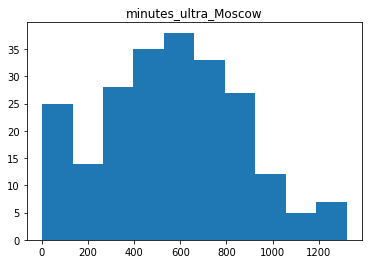

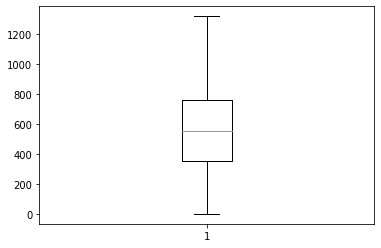

Q1-1.5IQR = -253.75
Q3+1.5IQR = 1372.25
Среднее: 560.28125
Медиана: 554.5
Дисперсия: 91297.88018497758
Стандартное отклонение: 302.1553907925152
-------------------------------------------------------------------------------------------------------------------


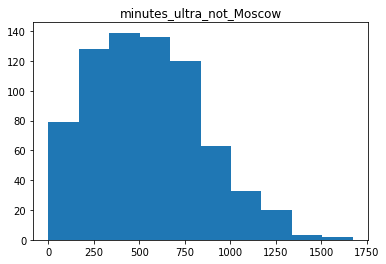

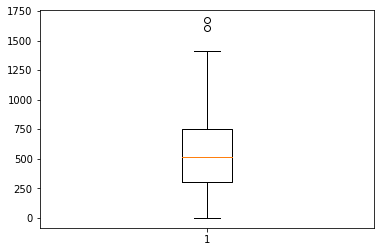

Q1-1.5IQR = -365.75
Q3+1.5IQR = 1428.25
Среднее: 543.8741355463347
Медиана: 519.0
Дисперсия: 94034.196047555
Стандартное отклонение: 306.64995686866644
-------------------------------------------------------------------------------------------------------------------


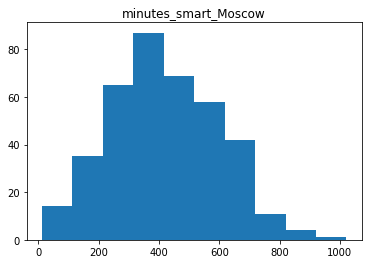

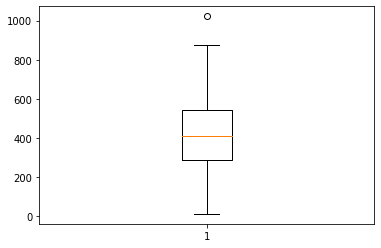

Q1-1.5IQR = -91.0
Q3+1.5IQR = 925.0
Среднее: 417.4818652849741
Медиана: 408.0
Дисперсия: 31471.704865083102
Стандартное отклонение: 177.40266307212838
-------------------------------------------------------------------------------------------------------------------


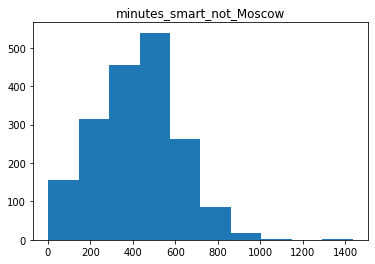

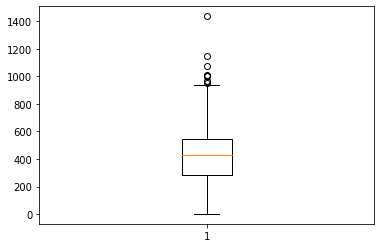

Q1-1.5IQR = -106.5
Q3+1.5IQR = 937.5
Среднее: 419.8523160762943
Медиана: 427.0
Дисперсия: 36628.051787162854
Стандартное отклонение: 191.38456517484073
-------------------------------------------------------------------------------------------------------------------


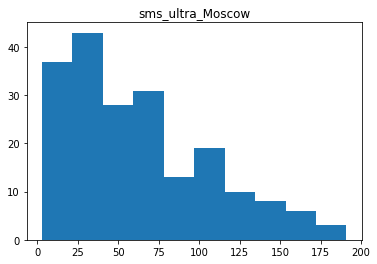

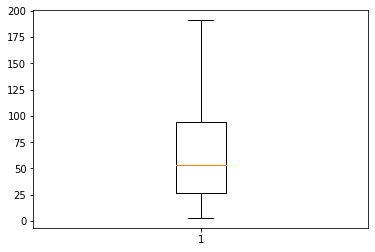

Q1-1.5IQR = -75.0
Q3+1.5IQR = 195.0
Среднее: 62.74242424242424
Медиана: 53.0
Дисперсия: 1940.6795108444855
Стандартное отклонение: 44.05314416525211
-------------------------------------------------------------------------------------------------------------------


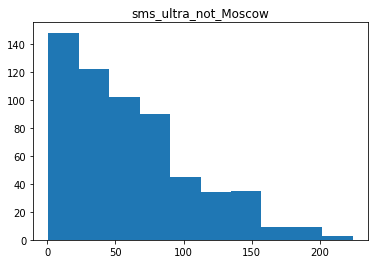

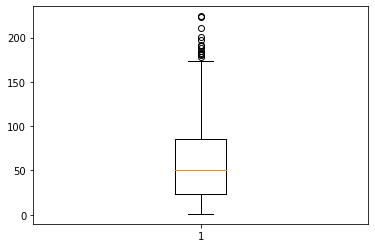

Q1-1.5IQR = -67.5
Q3+1.5IQR = 176.5
Среднее: 60.63651591289782
Медиана: 50.0
Дисперсия: 2167.9465166998298
Стандартное отклонение: 46.561212577636226
-------------------------------------------------------------------------------------------------------------------


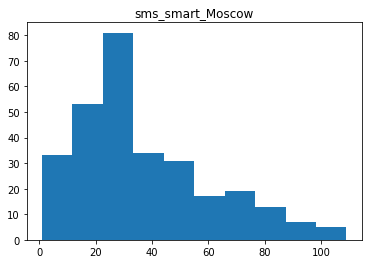

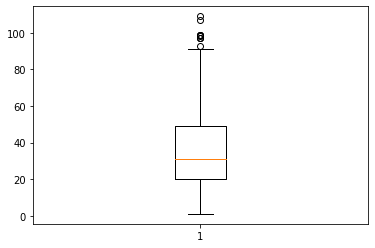

Q1-1.5IQR = -23.5
Q3+1.5IQR = 92.5
Среднее: 36.58703071672355
Медиана: 31.0
Дисперсия: 564.9281873860396
Стандартное отклонение: 23.768218010318726
-------------------------------------------------------------------------------------------------------------------


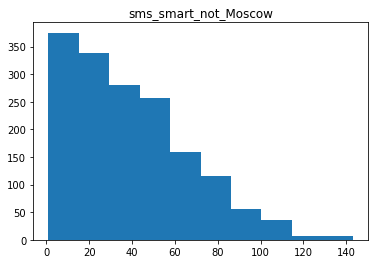

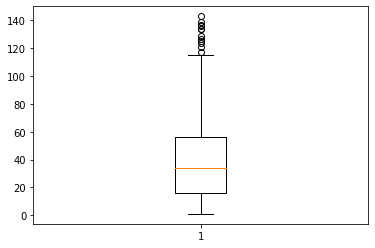

Q1-1.5IQR = -44.0
Q3+1.5IQR = 116.0
Среднее: 39.09944751381215
Медиана: 34.0
Дисперсия: 744.4544775815493
Стандартное отклонение: 27.284693100373133
-------------------------------------------------------------------------------------------------------------------


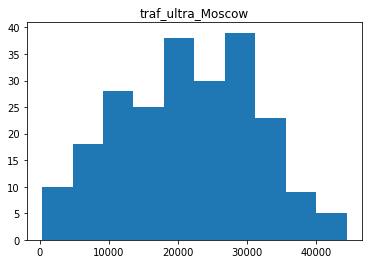

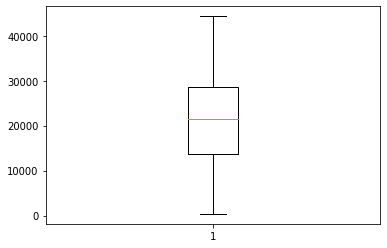

Q1-1.5IQR = -8644.5
Q3+1.5IQR = 51111.5
Среднее: 21321.777777777777
Медиана: 21493.0
Дисперсия: 95925889.35218254
Стандартное отклонение: 9794.176297789547
-------------------------------------------------------------------------------------------------------------------


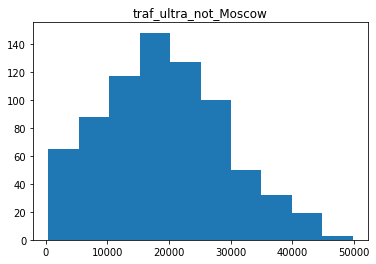

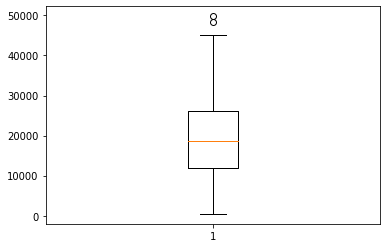

Q1-1.5IQR = -9514.5
Q3+1.5IQR = 47337.5
Среднее: 19221.89319092123
Медиана: 18658.0
Дисперсия: 98703200.50461936
Стандартное отклонение: 9934.948439957772
-------------------------------------------------------------------------------------------------------------------


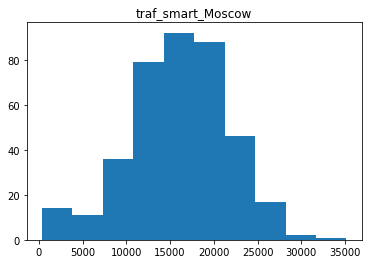

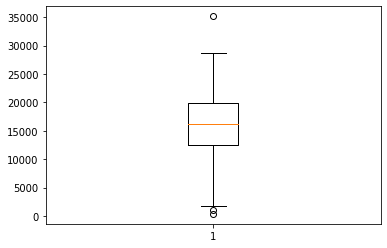

Q1-1.5IQR = 1606.0
Q3+1.5IQR = 30838.0
Среднее: 16038.512953367876
Медиана: 16173.5
Дисперсия: 31568669.195935674
Стандартное отклонение: 5618.600287966361
-------------------------------------------------------------------------------------------------------------------


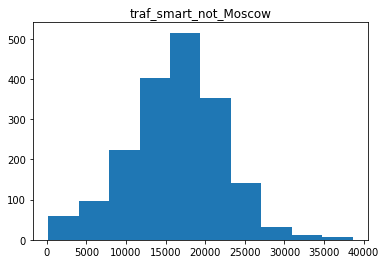

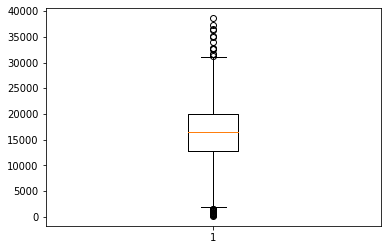

Q1-1.5IQR = 1710.0
Q3+1.5IQR = 31126.0
Среднее: 16286.7979359044
Медиана: 16601.0
Дисперсия: 34927954.00480008
Стандартное отклонение: 5909.987648447337
-------------------------------------------------------------------------------------------------------------------


In [30]:
# Let's build graphs
table_names = ['minutes_ultra_Moscow', 'minutes_ultra_not_Moscow', 'minutes_smart_Moscow', 'minutes_smart_not_Moscow',
               'sms_ultra_Moscow', 'sms_ultra_not_Moscow', 'sms_smart_Moscow', 'sms_smart_not_Moscow',
               'traf_ultra_Moscow', 'traf_ultra_not_Moscow', 'traf_smart_Moscow', 'traf_smart_not_Moscow'                 
              ]  

hist_box_do(minutes_ultra_Moscow, table_names[0])
hist_box_do(minutes_ultra_not_Moscow, table_names[1])
hist_box_do(minutes_smart_Moscow, table_names[2])
hist_box_do(minutes_smart_not_Moscow, table_names[3])

hist_box_do(sms_ultra_Moscow, table_names[4])
hist_box_do(sms_ultra_not_Moscow, table_names[5])
hist_box_do(sms_smart_Moscow, table_names[6])
hist_box_do(sms_smart_not_Moscow, table_names[7])

hist_box_do(traf_ultra_Moscow, table_names[8])
hist_box_do(traf_ultra_not_Moscow, table_names[9])
hist_box_do(traf_smart_Moscow, table_names[10])
hist_box_do(traf_smart_not_Moscow, table_names[11])

### Remove outliers

In [31]:
def blowout(table): 
    
    bot = bot_line(table)
    top = top_line(table)
    index = table.loc[(table < bot) | (table > top)].index
    table = table.drop(index).reset_index(drop=True)
    return table

minutes_ultra_Moscow = blowout(minutes_ultra_Moscow)
minutes_ultra_not_Moscow = blowout(minutes_ultra_not_Moscow)
minutes_smart_Moscow = blowout(minutes_smart_Moscow)
minutes_smart_not_Moscow = blowout(minutes_smart_not_Moscow)

sms_ultra_Moscow = blowout(sms_ultra_Moscow)
sms_ultra_not_Moscow = blowout(sms_ultra_not_Moscow)
sms_smart_Moscow = blowout(sms_smart_Moscow)
sms_smart_not_Moscow = blowout(sms_smart_not_Moscow)

traf_ultra_Moscow = blowout(traf_ultra_Moscow)
traf_ultra_not_Moscow = blowout(traf_ultra_not_Moscow)
traf_smart_Moscow = blowout(traf_smart_Moscow)
traf_smart_not_Moscow = blowout(traf_smart_not_Moscow)

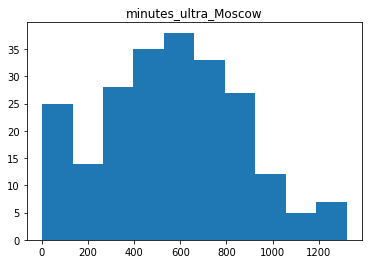

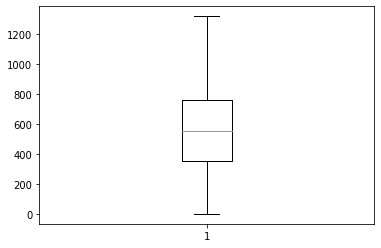

Q1-1.5IQR = -253.75
Q3+1.5IQR = 1372.25
Среднее: 560.28125
Медиана: 554.5
Дисперсия: 91297.88018497758
Стандартное отклонение: 302.1553907925152
-------------------------------------------------------------------------------------------------------------------


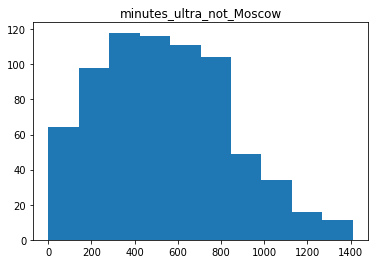

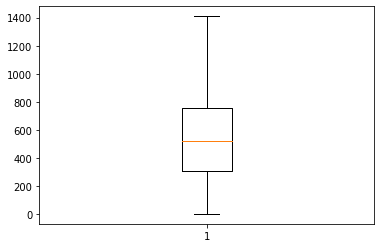

Q1-1.5IQR = -364.5
Q3+1.5IQR = 1423.5
Среднее: 540.8307905686546
Медиана: 519.0
Дисперсия: 90939.71299506858
Стандартное отклонение: 301.56212128692255
-------------------------------------------------------------------------------------------------------------------


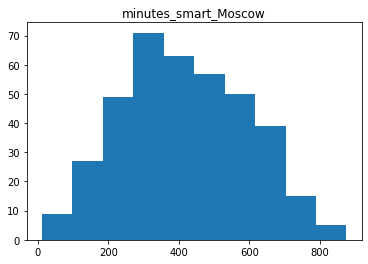

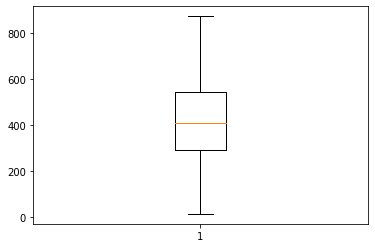

Q1-1.5IQR = -91.0
Q3+1.5IQR = 925.0
Среднее: 415.9116883116883
Медиана: 408.0
Дисперсия: 30599.518222402596
Стандартное отклонение: 174.92717977033357
-------------------------------------------------------------------------------------------------------------------


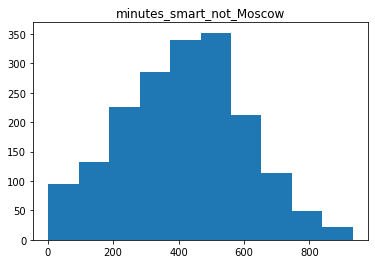

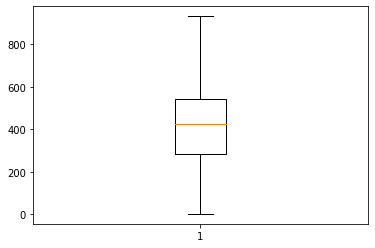

Q1-1.5IQR = -107.25
Q3+1.5IQR = 934.75
Среднее: 416.6927710843373
Медиана: 426.5
Дисперсия: 34669.85569565935
Стандартное отклонение: 186.1984309699181
-------------------------------------------------------------------------------------------------------------------


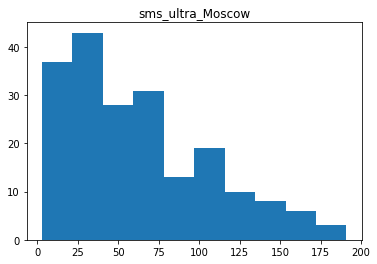

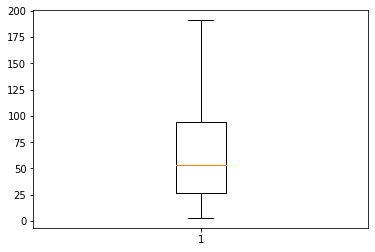

Q1-1.5IQR = -75.0
Q3+1.5IQR = 195.0
Среднее: 62.74242424242424
Медиана: 53.0
Дисперсия: 1940.6795108444855
Стандартное отклонение: 44.05314416525211
-------------------------------------------------------------------------------------------------------------------


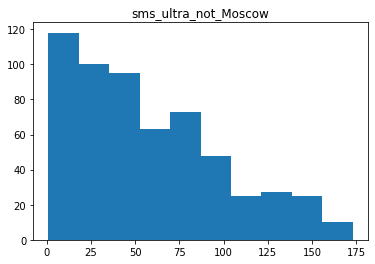

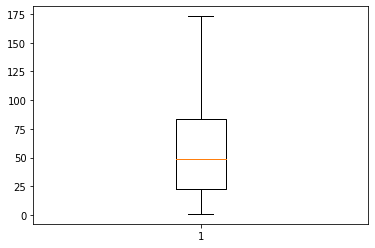

Q1-1.5IQR = -68.5
Q3+1.5IQR = 175.5
Среднее: 57.65239726027397
Медиана: 49.0
Дисперсия: 1801.517043985996
Стандартное отклонение: 42.44428164059319
-------------------------------------------------------------------------------------------------------------------


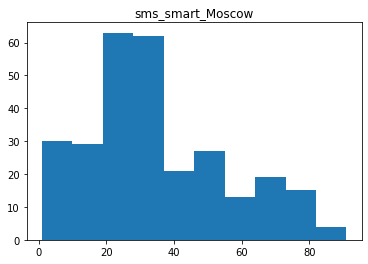

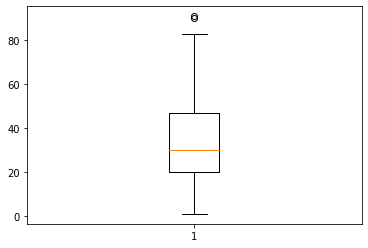

Q1-1.5IQR = -20.5
Q3+1.5IQR = 87.5
Среднее: 34.36395759717315
Медиана: 30.0
Дисперсия: 438.89898002656446
Стандартное отклонение: 20.94991599091902
-------------------------------------------------------------------------------------------------------------------


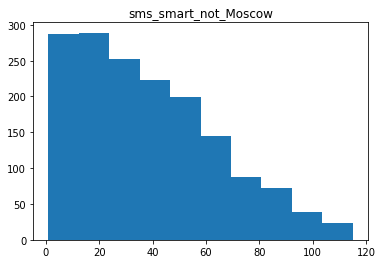

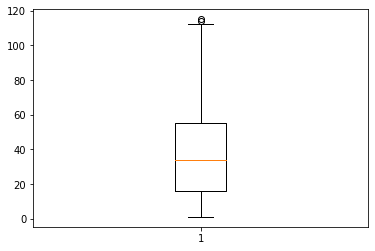

Q1-1.5IQR = -42.5
Q3+1.5IQR = 113.5
Среднее: 38.42115027829313
Медиана: 34.0
Дисперсия: 687.0632405077242
Стандартное отклонение: 26.211891204331753
-------------------------------------------------------------------------------------------------------------------


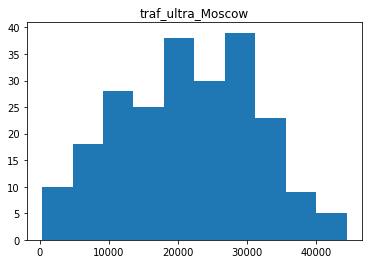

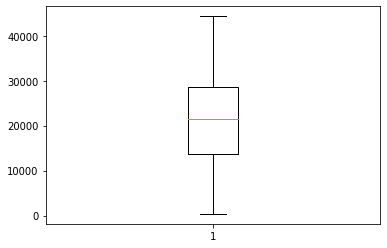

Q1-1.5IQR = -8644.5
Q3+1.5IQR = 51111.5
Среднее: 21321.777777777777
Медиана: 21493.0
Дисперсия: 95925889.35218254
Стандартное отклонение: 9794.176297789547
-------------------------------------------------------------------------------------------------------------------


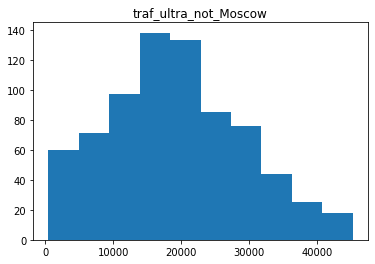

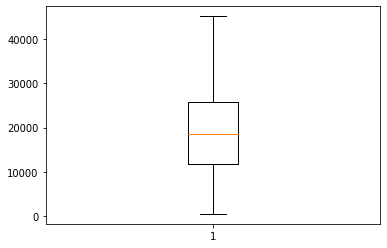

Q1-1.5IQR = -9363.75
Q3+1.5IQR = 47062.25
Среднее: 19141.91967871486
Медиана: 18620.0
Дисперсия: 96568094.05252108
Стандартное отклонение: 9826.906637010503
-------------------------------------------------------------------------------------------------------------------


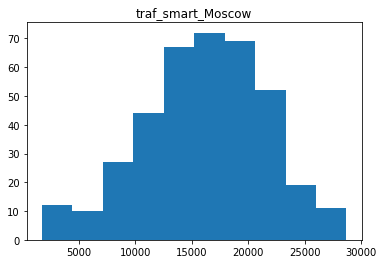

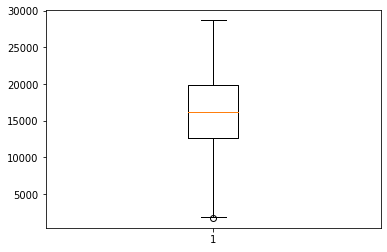

Q1-1.5IQR = 1781.75
Q3+1.5IQR = 30703.75
Среднее: 16068.746736292429
Медиана: 16185.0
Дисперсия: 29625909.095375445
Стандартное отклонение: 5442.968775895692
-------------------------------------------------------------------------------------------------------------------


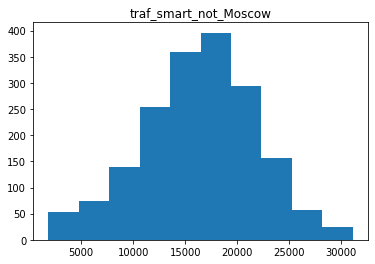

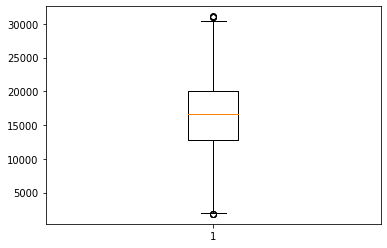

Q1-1.5IQR = 1934.875
Q3+1.5IQR = 30947.875
Среднее: 16328.913163716814
Медиана: 16623.0
Дисперсия: 30543284.517635144
Стандартное отклонение: 5526.5979153214275
-------------------------------------------------------------------------------------------------------------------


In [32]:
hist_box_do(minutes_ultra_Moscow, table_names[0])
hist_box_do(minutes_ultra_not_Moscow, table_names[1])
hist_box_do(minutes_smart_Moscow, table_names[2])
hist_box_do(minutes_smart_not_Moscow, table_names[3])

hist_box_do(sms_ultra_Moscow, table_names[4])
hist_box_do(sms_ultra_not_Moscow, table_names[5])
hist_box_do(sms_smart_Moscow, table_names[6])
hist_box_do(sms_smart_not_Moscow, table_names[7])

hist_box_do(traf_ultra_Moscow, table_names[8])
hist_box_do(traf_ultra_not_Moscow, table_names[9])
hist_box_do(traf_smart_Moscow, table_names[10])
hist_box_do(traf_smart_not_Moscow, table_names[11])

## Conclusion

Based on the histograms, we can make an obvious conclusion that SMS is rarely used by anyone.

In the tariff `"Ultra"`: <br />
Both in Moscow and in the regions, users do not even go beyond the limits of the service package. <br />
In the tariff `"Smart"`: <br />
Both in Moscow and in the regions, users are close to going beyond the limits for the number of minutes and SMS, and slightly go beyond the limits of the standard Internet traffic package.

# Part 4. Hypothesis testing

### Null hypothesis:
average revenue from users of Ultra tariffs is equal to average revenue from users of Smart tariffs <br />
### Alternative:
average revenue from Ultra users is NOT equal to average revenue from Smart users <br />
### alpha:
0.05

### Null hypothesis:
average revenue from users of Ultra tariffs is equal to average revenue from users of Smart tariffs <br />
### Alternative:
average revenue from Ultra users is NOT equal to average revenue from Smart users <br />
### alpha:
0.05

In [33]:
profit_tariff_ultra = df_general.loc[df_general['tariff'] == 'ultra', 'profit']
profit_tariff_smart = df_general.loc[df_general['tariff'] == 'smart', 'profit']

alpha = 0.05

results = st.ttest_ind(
    profit_tariff_ultra, 
    profit_tariff_smart)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение:  1.5930187141643347e-284
Отвергаем нулевую гипотезу


## Conclusion
The null hypothesis was rejected, which means that the average revenue from Ultra tariff users is not equal to the average revenue from Smart tariff users.

## Testing the hypothesis that the average revenue from users from Moscow differs from revenue from users from other regions

### Null hypothesis:
average revenue from users from Moscow is equal to revenue from users from other regions <br />
### Alternative:
average revenue from users from Moscow is NOT equal to revenue from users from other regions <br />
### alpha:
0.05

In [34]:
profit_p_from_Moscow = df_general.loc[df_general['city'] == 'Москва', 'profit']
profit_p_not_from_Moscow = df_general.loc[df_general['city'] != 'Москва', 'profit']

alpha = 0.05

results = st.ttest_ind(
    profit_p_from_Moscow, 
    profit_p_not_from_Moscow)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение:  0.24506493275719932
Не получилось отвергнуть нулевую гипотезу


## Conclusion
The null hypothesis was not rejected, which means that there are no significant differences between the samples.

# Part 5. Conclusion

### Total Moscow revenue for the year for each tariff, rub:

In [35]:
profit_p_from_Moscow_ultra = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] == 'Москва'), 'profit']
profit_p_from_Moscow_smart = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] == 'Москва'), 'profit']

print('Revenue')
print('Ultra', profit_p_from_Moscow_ultra.sum())
print('Smart', profit_p_from_Moscow_smart.sum())
print()

print('Call duration')
print('Ultra', minutes_ultra_Moscow.mean())
print('Smart', minutes_smart_Moscow.mean())
print()

print('Number of SMS')
print('Ultra', sms_ultra_Moscow.mean())
print('Smart', sms_smart_Moscow.mean())
print()

print('Internet traffic')
print('Ultra', traf_ultra_Moscow.mean())
print('Smart', traf_smart_Moscow.mean())
print()

Выручка
Ультра 464316.2109375
Смарт 410942.890625

Продолжительность разговора
Ультра 560.28125
Смарт 415.9116883116883

Кол-во смс
Ультра 62.74242424242424
Смарт 34.36395759717315

Интернет-трафик
Ультра 21321.777777777777
Смарт 16068.746736292429



### Total regional revenue for the year for each tariff, rub:

In [36]:
profit_p_not_from_Moscow_ultra = df_general.loc[(df_general['tariff'] == 'ultra') & (df_general['city'] != 'Москва'), 'profit']
profit_p_not_from_Moscow_smart = df_general.loc[(df_general['tariff'] == 'smart') & (df_general['city'] != 'Москва'), 'profit']

print('Revenue')
print('Ultra', profit_p_not_from_Moscow_ultra.sum())
print('Smart', profit_p_not_from_Moscow_smart.sum())
print()

print('Call duration')
print('Ultra', minutes_ultra_not_Moscow.mean())
print('Smart', minutes_smart_not_Moscow.mean())
print()

print('Number of SMS')
print('Ultra', sms_ultra_not_Moscow.mean())
print('Smart', sms_smart_not_Moscow.mean())
print()

print('Internet traffic')
print('Ultra', traf_ultra_not_Moscow.mean())
print('Smart', traf_smart_not_Moscow.mean())
print()

Выручка
Ультра 1565305.810546875
Смарт 2059976.0703125

Продолжительность разговора
Ультра 540.8307905686546
Смарт 416.6927710843373

Кол-во смс
Ультра 57.65239726027397
Смарт 38.42115027829313

Интернет-трафик
Ультра 19141.91967871486
Смарт 16328.913163716814



## Conclusions:
1. The average duration of calls, number of SMS and Internet traffic is close to the "Smart" tariff both in the regions and in Moscow.
2. The revenue from the "Ultra" tariff in Moscow is slightly higher than from the "Smart" tariff, but in the region, the "Smart" tariff is confidently leading in terms of revenue.

### Therefore, from the point of view of revenue, in Moscow it will be more profitable to advertise the "Ultra" tariff, and in the regions the "Smart" tariff.

### Average user spending by tariffs
Tariff `"Ultra"`: <br />

Both in Moscow and in the regions, users do not even go beyond the limits of the service package.

Tariff `"Smart"`: <br />

Both in Moscow and in the regions, users are close to going beyond the limits for the number of minutes and SMS, and slightly go beyond the limits of the standard Internet traffic package.